<a href="https://colab.research.google.com/github/mukul-anissh/stock-trend-predictor/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/stocks_data.csv')

In [3]:
df.head()

,Date,Ticker,Close,High,Low,Open,Volume,RSI,SMA,EMA,...,MACD_Signal,MACD_Hist,Stoch_K,Stoch_D,Williams %R,ATR,CCI,ADX,OBV,MFI
0,2020-02-20,A,0.177897,0.159850,0.188415,0.182370,0.230053,0.344235,0.148564,0.146408,...,0.334062,0.606789,0.562175,0.605783,0.562175,0.000000,0.424760,0.136795,0.202776,0.290075
1,2020-02-21,A,0.184090,0.160720,0.188754,0.173884,0.147374,0.394223,0.150200,0.146397,...,0.338650,0.606835,0.746201,0.713676,0.746201,0.003296,0.443687,0.144321,0.215624,0.383419
2,2020-02-24,A,0.145321,0.138966,0.160106,0.159627,0.269810,0.180105,0.149124,0.140691,...,0.336218,0.548774,0.079274,0.462697,0.079274,0.079185,0.098309,0.173469,0.194344,0.366106
3,2020-02-25,A,0.123688,0.124086,0.140358,0.146728,0.253805,0.104166,0.145495,0.132566,...,0.325818,0.482860,0.031014,0.281941,0.031014,0.109338,0.088954,0.210336,0.174166,0.282216
4,2020-02-26,A,0.125045,0.118778,0.143748,0.129416,0.228190,0.114628,0.141051,0.125724,...,0.311429,0.449854,0.050099,0.045055,0.050099,0.118479,0.209186,0.244570,0.192580,0.186029


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604816 entries, 0 to 604815
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         604816 non-null  object 
 1   Ticker       604816 non-null  object 
 2   Close        604816 non-null  float64
 3   High         604816 non-null  float64
 4   Low          604816 non-null  float64
 5   Open         604816 non-null  float64
 6   Volume       604816 non-null  float64
 7   RSI          604816 non-null  float64
 8   SMA          604816 non-null  float64
 9   EMA          604816 non-null  float64
 10  MACD         604816 non-null  float64
 11  MACD_Signal  604816 non-null  float64
 12  MACD_Hist    604816 non-null  float64
 13  Stoch_K      604816 non-null  float64
 14  Stoch_D      604816 non-null  float64
 15  Williams %R  604816 non-null  float64
 16  ATR          604816 non-null  float64
 17  CCI          604816 non-null  float64
 18  ADX          604816 non-

In [61]:
import numpy as np

rollback = 40
numerical_features = ['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'SMA', 'EMA', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Stoch_K', 'Stoch_D', 'Williams %R', 'ATR', 'CCI', 'ADX', 'OBV', 'MFI']
x, y, ticker_list = [], [], []
sequence_dates = []

for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker]
    ticker_data.reset_index(drop=True, inplace=True)

    data = ticker_data[numerical_features].values
    closes = ticker_data['Close'].values

    for i in range(len(ticker_data) - rollback):
        x.append(data[i:i + rollback])
        y.append(closes[i + rollback])
        ticker_list.append(ticker)
        sequence_dates.append(ticker_data['Date'].iloc[i + rollback])

x = np.array(x)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), shuffle=False)

Epoch 1/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - loss: 0.0034 - mae: 0.0369 - val_loss: 5.2117e-04 - val_mae: 0.0170
Epoch 2/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 52s 7ms/step - loss: 6.7911e-04 - mae: 0.0194 - val_loss: 5.0350e-04 - val_mae: 0.0165
Epoch 3/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - loss: 6.4051e-04 - mae: 0.0188 - val_loss: 4.1011e-04 - val_mae: 0.0146
Epoch 4/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 6.2360e-04 - mae: 0.0185 - val_loss: 4.1968e-04 - val_mae: 0.0145
Epoch 5/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - loss: 6.1534e-04 - mae: 0.0184 - val_loss: 3.9005e-04 - val_mae: 0.0140
Epoch 6/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 51s 7ms/step - loss: 6.1300e-04 - mae: 0.0183 - val_loss: 3.9453e-04 - val_mae: 0.0141
Epoch 7/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 6.0725e-04 - mae: 0.0182 - val_loss: 3.9049e-04 - val_mae: 0.0139
Epoch 8/50
7311/7311 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 6.0263e-04 - mae: 0.0181 - val_loss: 3

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test MAE: {mae:.2f}, Test RMSE: {rmse:.2f}")


3656/3656 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Test MAE: 0.01, Test RMSE: 0.02


In [14]:
model.save('lstm_stock_model.keras')

In [17]:
import pickle
with open('/content/scalers.pkl', 'rb') as f:
    scalers = pickle.load(f)

In [ ]:
y_pred_actual =  []

for i in range(len(y_pred)):
    ticker = ticker_list[i]
    scaler = scalers[ticker]

    dummy = np.zeros((1, len(numerical_features)))
    close_index = numerical_features.index('Close')
    dummy[0, close_index] = y_pred[i]

    inversed = scaler.inverse_transform(dummy)
    y_pred_actual.append(inversed[0, close_index])

y_pred_actual = np.array(y_pred_actual)

In [49]:
y_test_actual =  []

for i in range(len(y_test)):
    ticker = ticker_list[i]
    scaler = scalers[ticker]

    dummy = np.zeros((1, len(numerical_features)))
    close_index = numerical_features.index('Close')
    dummy[0, close_index] = y_test[i]

    inversed = scaler.inverse_transform(dummy)
    y_test_actual.append(inversed[0, close_index])

y_test_actual = np.array(y_test_actual)

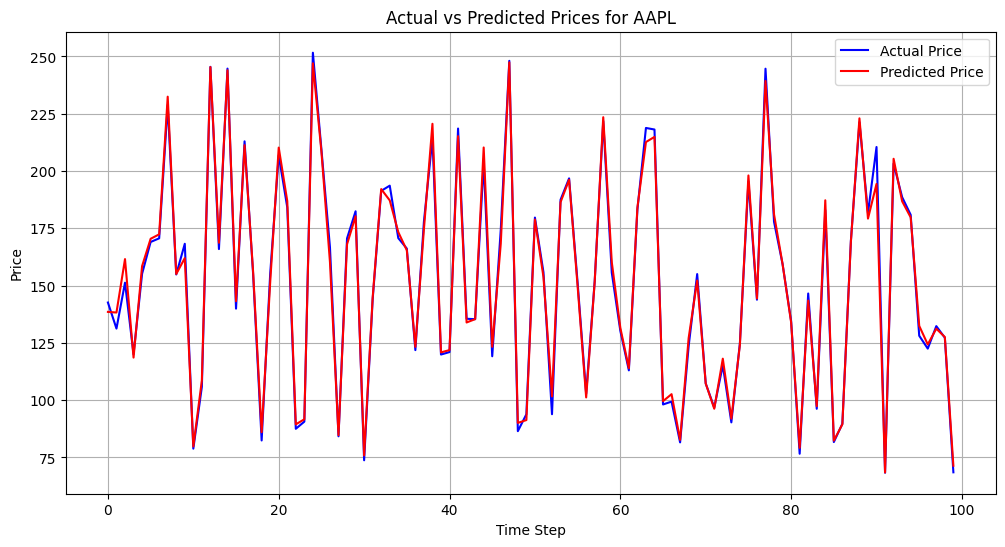

In [52]:
import matplotlib.pyplot as plt

# visualise for 'AAPL'
ticker_to_plot = 'AAPL'
indices = np.where(np.array(ticker_list) == ticker_to_plot)[0]

y_true = y_test_actual[indices][-100:]
y_pred = y_pred_actual[indices][-100:]

plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title(f'Actual vs Predicted Prices for {ticker_to_plot}')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

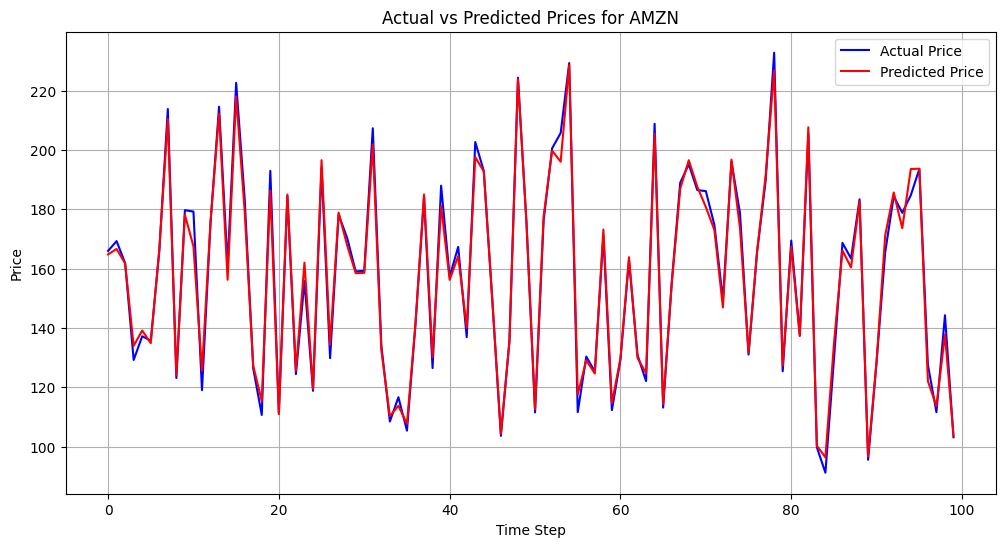

In [53]:
ticker_to_plot = 'AMZN'
indices = np.where(np.array(ticker_list) == ticker_to_plot)[0]

y_true = y_test_actual[indices][-100:]
y_pred = y_pred_actual[indices][-100:]

plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title(f'Actual vs Predicted Prices for {ticker_to_plot}')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

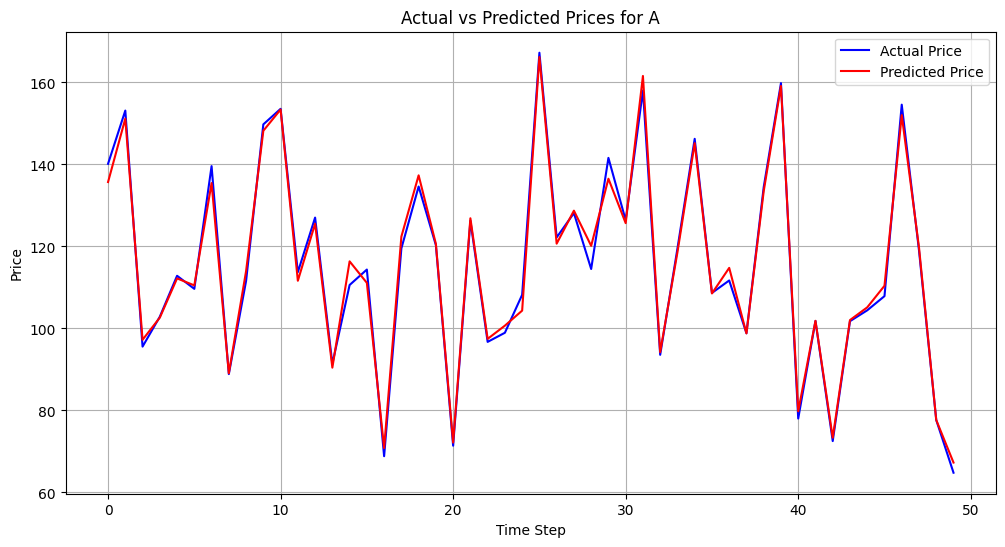

In [58]:
ticker_to_plot = 'A'
indices = np.where(np.array(ticker_list) == ticker_to_plot)[0]

y_true = y_test_actual[indices][-50:]
y_pred = y_pred_actual[indices][-50:]

plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title(f'Actual vs Predicted Prices for {ticker_to_plot}')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
with open('/content/ticker_list.pkl', 'wb') as f:
    pickle.dump(ticker_list, f)